In [72]:
from pandas import read_csv
A = read_csv("C:/Users/Dell/Desktop/50_Startups.csv")

In [73]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [74]:
A.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [75]:
A.corr()


,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [76]:
A.corr()["PROFIT"]


RND       0.972900
ADMIN     0.200717
MKT       0.747766
PROFIT    1.000000
Name: PROFIT, dtype: float64

# Relation of Profit with RND

In [77]:
from numpy import corrcoef
corrcoef(A.RND,A.PROFIT)

array([[1.        , 0.97290047],
       [0.97290047, 1.        ]])

Text(0.5, 1.0, 'RND vs PROFIT Scatterplot')

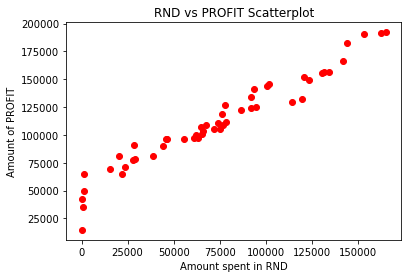

In [78]:
from warnings import filterwarnings
filterwarnings("ignore")
from matplotlib.pyplot import scatter,plot,xlabel,ylabel,title
 
scatter(A.RND,A.PROFIT,c="red")
xlabel("Amount spent in RND")
ylabel("Amount of PROFIT")
title("RND vs PROFIT Scatterplot")

<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

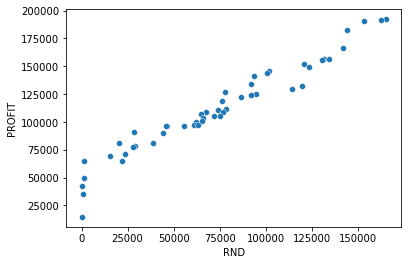

In [79]:
from seaborn import scatterplot
scatterplot(A.RND,A.PROFIT)


# Relationship with PROFIT with MKT

In [80]:
from numpy import corrcoef
corrcoef(A.MKT,A.PROFIT)

array([[1.        , 0.74776572],
       [0.74776572, 1.        ]])

<AxesSubplot:xlabel='MKT', ylabel='PROFIT'>

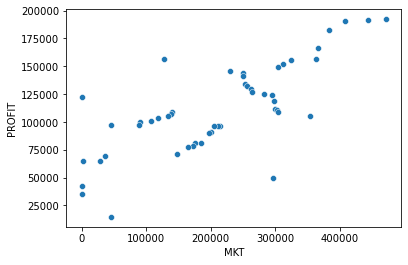

In [81]:
from seaborn import scatterplot
scatterplot(A.MKT,A.PROFIT)

In [82]:
X = A[["RND"]]
Y = A[["PROFIT"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=51)

# Sampling Bias

<AxesSubplot:ylabel='Density'>

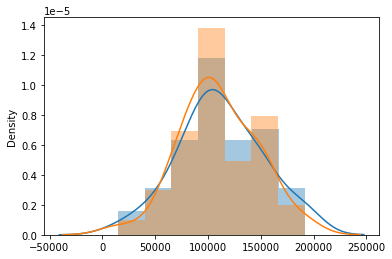

In [83]:
from seaborn import distplot
distplot(Y)
distplot(ytrain)

# Regression model

In [84]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)


# Fetch and round off of bo and b1

In [85]:
model.intercept_

array([51453.71082217])

In [86]:
model.intercept_[0]


51453.71082216924

In [87]:
round(model.intercept_[0],2)


51453.71

In [88]:

b0 = round(model.intercept_[0],2)


In [89]:
model.coef_


array([[0.83438573]])

In [90]:

model.coef_[0]


array([0.83438573])

In [91]:
model.coef_[0][0]


0.8343857309530335

In [92]:
round(model.coef_[0][0],2)


0.83

In [93]:
b1 = round(model.coef_[0][0],2)


# Create predictions on test data

In [94]:
xtest.join(ytest)


,RND,PROFIT
4,142107.34,166187.94
48,542.05,35673.41
47,0.00,42559.73
15,114523.61,129917.04
0,165349.20,192261.83
17,94657.16,125370.37
29,65605.48,101004.64
31,61136.38,97483.56
19,86419.70,122776.86
2,153441.51,191050.39


In [95]:



W = xtest.join(ytest)


In [96]:
PRED = []
for i in W.RND:
    predicted_profit = b0 + b1*i
    predicted_profit = round(predicted_profit,2)
    PRED.append(predicted_profit)

In [97]:
PRED

[169402.8,
 51903.61,
 51453.71,
 146508.31,
 188693.55,
 130019.15,
 105906.26,
 102196.91,
 123182.06,
 178810.16]

In [98]:
W

,RND,PROFIT
4,142107.34,166187.94
48,542.05,35673.41
47,0.00,42559.73
15,114523.61,129917.04
0,165349.20,192261.83
17,94657.16,125370.37
29,65605.48,101004.64
31,61136.38,97483.56
19,86419.70,122776.86
2,153441.51,191050.39


In [99]:
W["Pred_PROFIT"]=PRED


In [100]:
W

,RND,PROFIT,Pred_PROFIT
4,142107.34,166187.94,169402.80
48,542.05,35673.41,51903.61
47,0.00,42559.73,51453.71
15,114523.61,129917.04,146508.31
0,165349.20,192261.83,188693.55
17,94657.16,125370.37,130019.15
29,65605.48,101004.64,105906.26
31,61136.38,97483.56,102196.91
19,86419.70,122776.86,123182.06
2,153441.51,191050.39,178810.16


# Find Error

In [101]:
W["Error"] = W.PROFIT - W.Pred_PROFIT


In [102]:
W

,RND,PROFIT,Pred_PROFIT,Error
4,142107.34,166187.94,169402.80,-3214.86
48,542.05,35673.41,51903.61,-16230.20
47,0.00,42559.73,51453.71,-8893.98
15,114523.61,129917.04,146508.31,-16591.27
0,165349.20,192261.83,188693.55,3568.28
17,94657.16,125370.37,130019.15,-4648.78
29,65605.48,101004.64,105906.26,-4901.62
31,61136.38,97483.56,102196.91,-4713.35
19,86419.70,122776.86,123182.06,-405.20
2,153441.51,191050.39,178810.16,12240.23


# Find Test Error

In [103]:
from numpy import abs

W["Absolutes"] = abs(W.Error)

In [104]:
W

,RND,PROFIT,Pred_PROFIT,Error,Absolutes
4,142107.34,166187.94,169402.80,-3214.86,3214.86
48,542.05,35673.41,51903.61,-16230.20,16230.20
47,0.00,42559.73,51453.71,-8893.98,8893.98
15,114523.61,129917.04,146508.31,-16591.27,16591.27
0,165349.20,192261.83,188693.55,3568.28,3568.28
17,94657.16,125370.37,130019.15,-4648.78,4648.78
29,65605.48,101004.64,105906.26,-4901.62,4901.62
31,61136.38,97483.56,102196.91,-4713.35,4713.35
19,86419.70,122776.86,123182.06,-405.20,405.20
2,153441.51,191050.39,178810.16,12240.23,12240.23


In [105]:
MAE = round(W.Absolutes.mean(),2)


In [106]:
MAE

7540.78

# Plot Regression Line

Text(0.5, 1.0, 'RND vs PROFIT scatterplot with Regression Line')

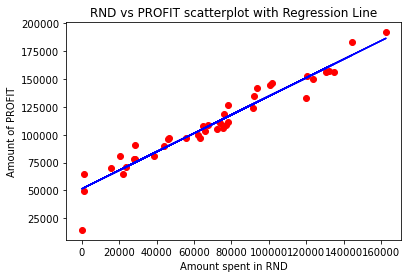

In [107]:
from matplotlib.pyplot import scatter,plot,xlabel,ylabel,title

scatter(xtrain.RND,ytrain.PROFIT,c="red")
plot(xtrain.RND,b0 + b1*xtrain.RND,c="blue")
xlabel("Amount spent in RND")
ylabel("Amount of PROFIT")
title("RND vs PROFIT scatterplot with Regression Line")

<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

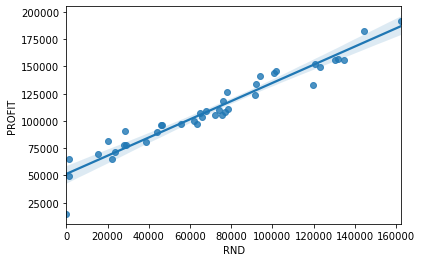

In [108]:
from seaborn import regplot
regplot(xtrain.RND,ytrain.PROFIT)